In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img = cv2.cvtColor(cv2.imread("img/rosto.png"), cv2.COLOR_BGR2RGB)
img.shape

(470, 751, 3)

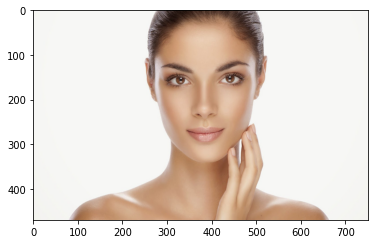

In [4]:
plt.imshow(img)

In [5]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

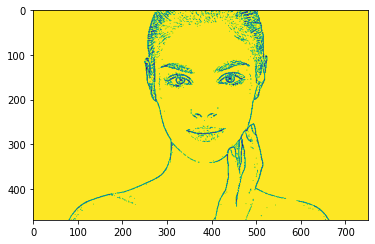

In [6]:
plt.imshow(edge_mask(img, 3, 3))

In [7]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

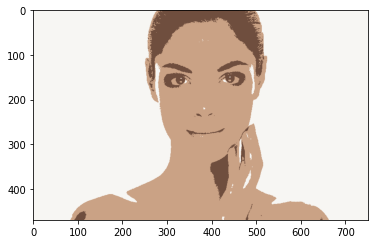

In [8]:
plt.imshow(color_quantization(img, 3))

In [9]:
def bileteral_filter(img, d, sigmaColor, sigmaSpace):
    return cv2.bilateralFilter(img, d=d, sigmaColor=sigmaColor,sigmaSpace=sigmaSpace)

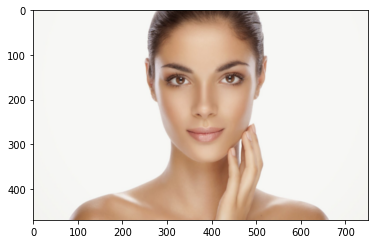

In [10]:
plt.imshow(bileteral_filter(img, 2, 1000, 1000))

In [24]:
def cartonize(img, edge_mask_line_size, edger_mask_blur_value, number_of_colors, biletareal_filter_d_parameter, biletareal_filter_sigmaColor, biletareal_filter_sigmaSpace):
    edges = edge_mask(img, edge_mask_line_size, edger_mask_blur_value)
    colors = color_quantization(img, number_of_colors)
    colors = bileteral_filter(colors, biletareal_filter_d_parameter, biletareal_filter_sigmaColor, biletareal_filter_sigmaSpace)
    cartoon = cv2.bitwise_and(colors, colors, mask=edges)
    return cartoon

In [99]:
def right_eye_cartonize(img):
    eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_righteye_2splits.xml')
    detected_eye = eye_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    eye = np.copy(img)
    for (column, row, width, height) in detected_eye:
        eye = img[row:row + height, column:column + width]
    return cartonize(eye, edge_mask_line_size=13, edger_mask_blur_value=13, number_of_colors=16, biletareal_filter_d_parameter=2, biletareal_filter_sigmaColor=100, biletareal_filter_sigmaSpace=300)

In [100]:
def left_eye_cartonize(img):
    eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_lefteye_2splits.xml')
    detected_eye = eye_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    eye = np.copy(img)
    for (column, row, width, height) in detected_eye:
        eye = img[row:row + height, column:column + width]
    return cartonize(eye, edge_mask_line_size=13, edger_mask_blur_value=13, number_of_colors=16, biletareal_filter_d_parameter=2, biletareal_filter_sigmaColor=100, biletareal_filter_sigmaSpace=300)

In [ ]:
def mouth_cartonize(img):
    smile_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_smile.xml')
    detected_smile = smile_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    smile = np.copy(img)
    for (column, row, width, height) in detected_smile:
        smile = img[row:row + height, column:column + width]
    return cartonize(smile, edge_mask_line_size=13, edger_mask_blur_value=13, number_of_colors=16, biletareal_filter_d_parameter=2, biletareal_filter_sigmaColor=100, biletareal_filter_sigmaSpace=300)

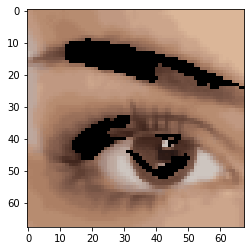

In [97]:
plt.imshow(right_eye_cartonize(img))

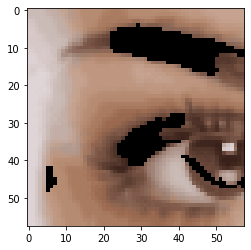

In [98]:
plt.imshow(left_eye_cartonize(img))

In [12]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')

In [13]:
detected_faces = face_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

In [14]:
face = np.copy(img)
for (column, row, width, height) in detected_faces:
    face = img[row:row + height, column:column + width]

In [18]:
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [19]:
detected_eyes = eye_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

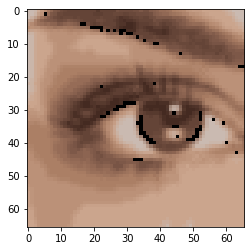

In [20]:
eye = np.copy(img)
for (column, row, width, height) in detected_eyes:
    eye = img[row:row + height, column:column + width]
    eye = cartonize(eye)

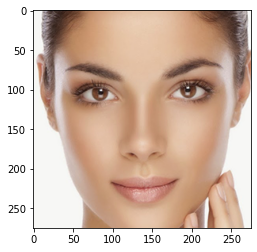

In [294]:
plt.imshow(face)

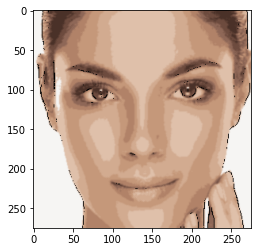

In [295]:
cartonize(face)

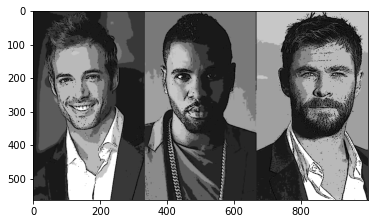

In [296]:
plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_RGB2GRAY), cmap='gray')